In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
wc=pd.read_csv(r"C:\Users\aksha\Downloads\wc-at.csv")

In [3]:
wc

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [4]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [5]:
wc.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


<Axes: xlabel='Waist', ylabel='Count'>

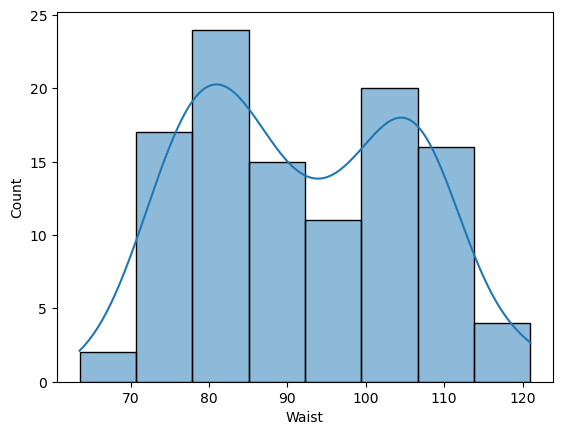

In [6]:
sns.histplot(wc['Waist'],kde=True)

<Axes: xlabel='Waist', ylabel='Density'>

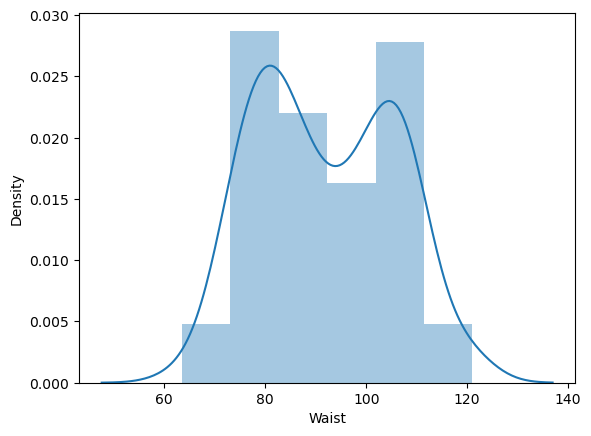

In [7]:
sns.distplot(wc['Waist'])

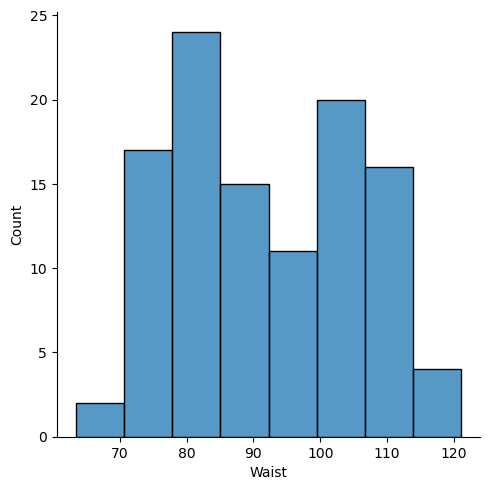

In [8]:
sns.displot(wc['Waist'])

In [9]:
wc['Waist'].skew()

0.1340560824786468

In [10]:
wc['Waist'].kurtosis()

-1.1026666011768886

<Axes: >

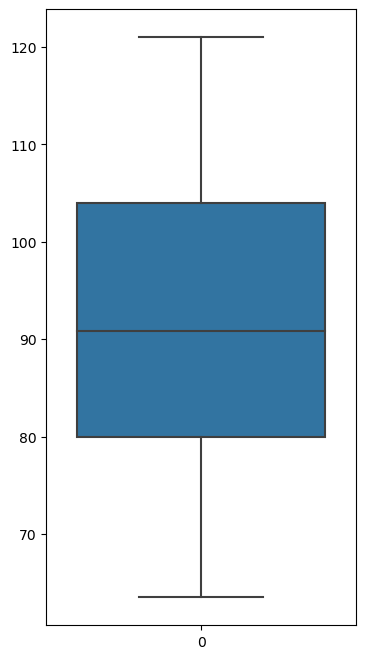

In [11]:
plt.figure(figsize=(4,8))
sns.boxplot(wc['Waist'])

<Axes: xlabel='AT', ylabel='Count'>

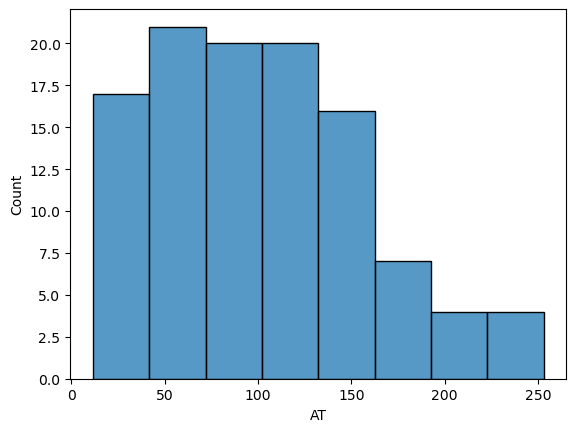

In [12]:
sns.histplot(wc['AT'])

<Axes: xlabel='AT', ylabel='Density'>

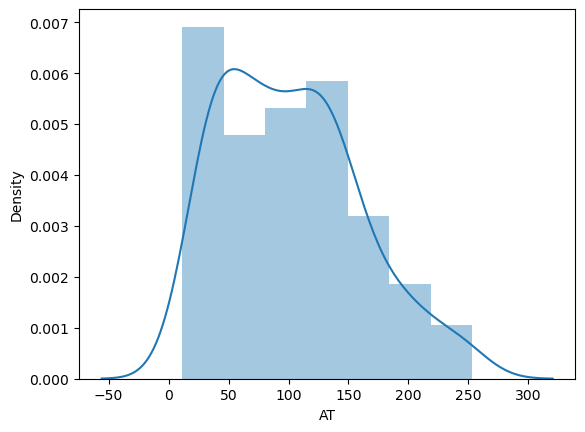

In [13]:
sns.distplot(wc['AT'])

In [14]:
wc['AT'].skew()


0.584869324127853

In [15]:
wc['AT'].kurtosis()

-0.28557567504584425

<Axes: >

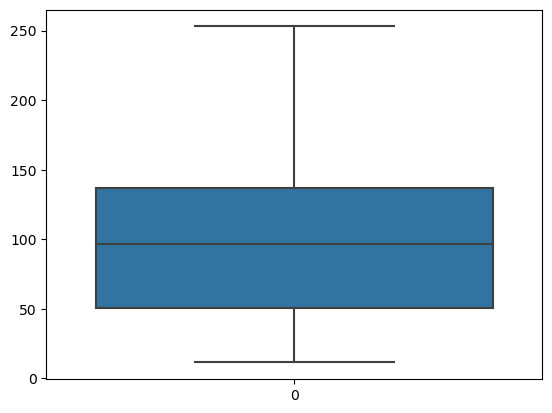

In [16]:
sns.boxplot(wc['AT'])

<Axes: xlabel='AT', ylabel='Waist'>

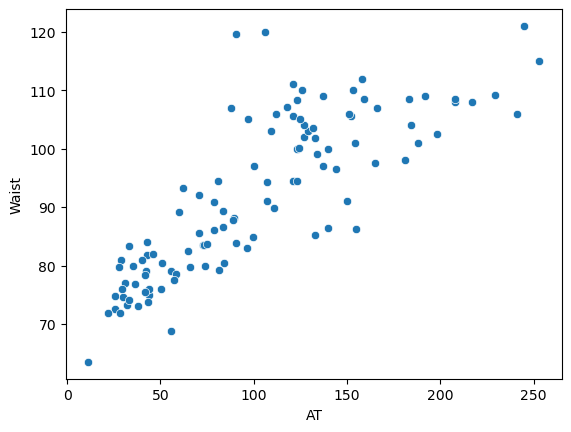

In [17]:
sns.scatterplot(x='AT',y='Waist',data=wc)

<Axes: xlabel='Waist', ylabel='AT'>

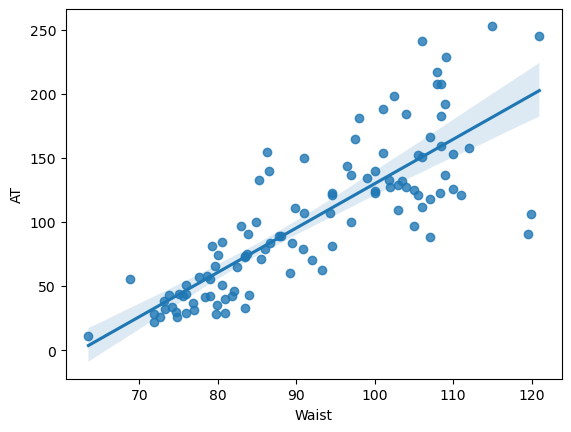

In [18]:
sns.regplot(y='AT',x='Waist',data=wc)

In [19]:
wc.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<Axes: >

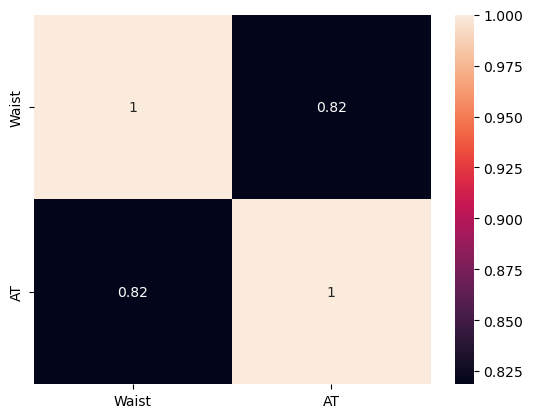

In [20]:
sns.heatmap(wc.corr(),annot=True)

In [21]:
model=smf.ols('AT~Waist',data=wc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.62e-27
Time:                        13:27:26   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### here the R-square is 0.670 ,so the model is not a good one

In [22]:
model.resid

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

<Axes: >

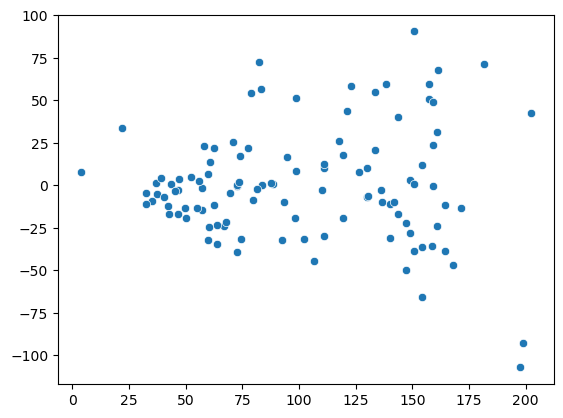

In [23]:
sns.scatterplot(x=model.fittedvalues,y=model.resid)

In [24]:
model.fittedvalues

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [25]:
wc

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [26]:
model.resid.mean()

-5.6321919605204275e-14

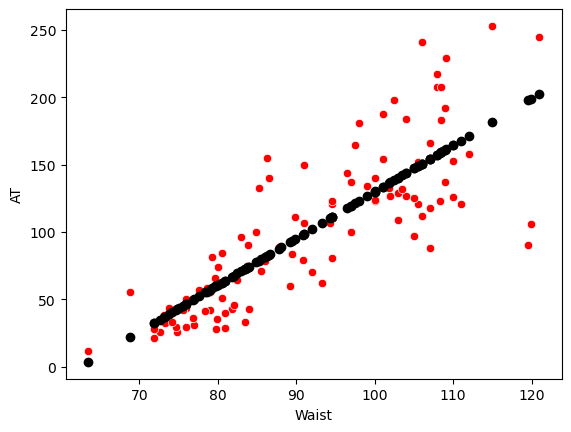

In [27]:
sns.scatterplot(y='AT',x='Waist',data=wc,color='red')
plt.scatter(wc['Waist'],model.fittedvalues,color='black')
plt.show()

In [28]:
mse=mean_squared_error(wc['AT'],model.fittedvalues)

In [29]:
rmse=np.sqrt(mse)

In [30]:
print(mse,rmse,model.rsquared)

1073.2292295533819 32.760177495755144 0.6700368930528429


### Our target r2=0.75

In [31]:
# here we can apply some transformations on the data

### Log Transformations

In [32]:
log_data=np.log(wc)

In [33]:
log_data

,Waist,AT
0,4.314149,3.247269
1,4.284965,3.253857
2,4.404277,3.751854
3,4.430221,3.756538
4,4.312811,3.395850
...,...,...
104,4.606170,4.820282
105,4.535820,4.130355
106,4.623010,4.890349
107,4.681205,5.337538


<Axes: xlabel='Waist', ylabel='Density'>

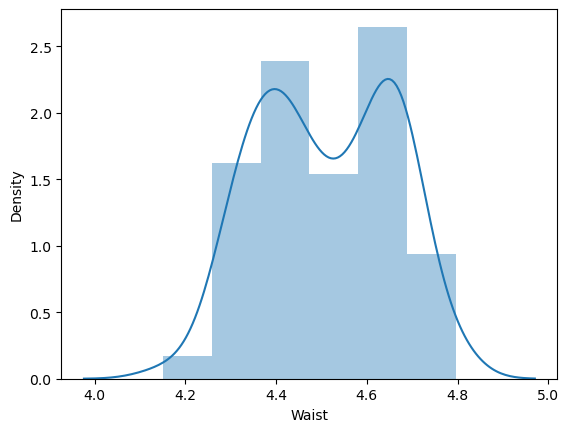

In [34]:
sns.distplot(log_data['Waist'])

<Axes: xlabel='AT', ylabel='Waist'>

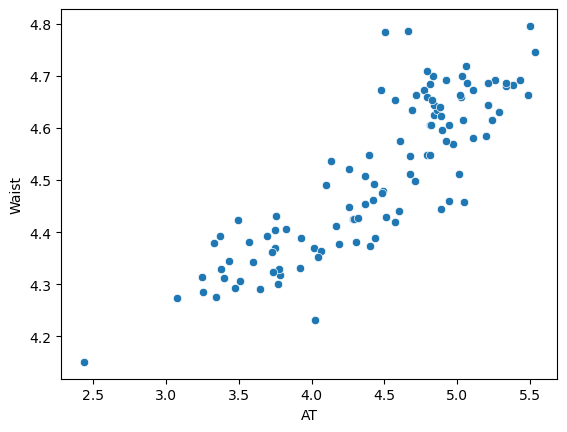

In [35]:
sns.scatterplot(x='AT',y='Waist',data=log_data)

In [36]:
log_model=smf.ols('AT~np.log(Waist)',data=wc).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 14 May 2024   Prob (F-statistic):           6.80e-28
Time:                        13:27:27   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

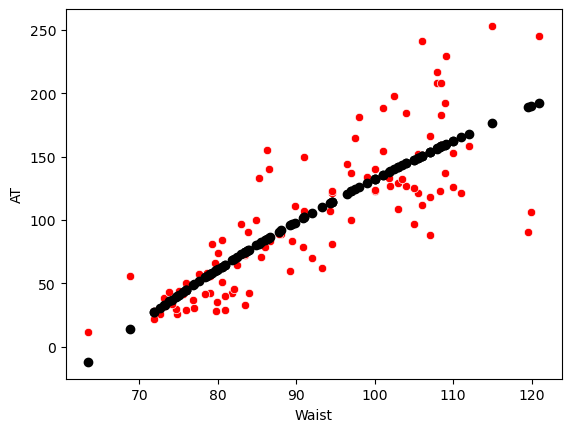

In [37]:
sns.scatterplot(y='AT',x='Waist',data=wc,color='red')
plt.scatter(wc['Waist'],log_model.fittedvalues,color='black')
plt.show()

In [38]:
lmse=mean_squared_error(wc['AT'],log_model.fittedvalues)
lrmse=np.sqrt(lmse)
print(lmse,lrmse,log_model.rsquared)

1056.0475288096718 32.49688490932126 0.6753193874202298


### SQRT

In [39]:
sqrt_model=smf.ols('AT~np.sqrt(Waist)',data=wc).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     220.9
Date:                Tue, 14 May 2024   Prob (F-statistic):           8.91e-28
Time:                        13:27:27   Log-Likelihood:                -534.38
No. Observations:                 109   AIC:                             1073.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -533.3436     42.856    -12.445      0.000    -618.301    -448.386
np.sqrt(Waist)    66.4431      4.470     14.863      0.000      57.581      75.305
==============================================================================
Omnibus:                        3.493   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.477
Skew:                           0.167   Prob(JB):                        0.176
Kurtosis:                       3.809   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

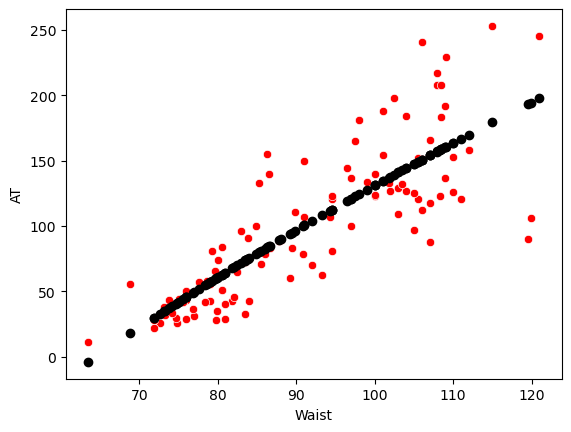

In [40]:
sns.scatterplot(y='AT',x='Waist',data=wc,color='red')
plt.scatter(wc['Waist'],sqrt_model.fittedvalues,color='black')
plt.show()

In [41]:
smse=mean_squared_error(wc['AT'],sqrt_model.fittedvalues)
srmse=np.sqrt(smse)
print(smse,srmse,sqrt_model.rsquared)

1061.3821514181736 32.57886049907476 0.6736792637618161


### CUBRT

In [42]:
curt_model=smf.ols('AT~np.cbrt(Waist)',data=wc).fit()
curt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     221.7
Date:                Tue, 14 May 2024   Prob (F-statistic):           7.85e-28
Time:                        13:27:28   Log-Likelihood:                -534.25
No. Observations:                 109   AIC:                             1073.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -850.5582     64.048    -13.280      0.000    -977.526    -723.590
np.cbrt(Waist)   211.5672     14.210     14.889      0.000     183.398     239.736
==============================================================================
Omnibus:                        3.398   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.225
Skew:                           0.189   Prob(JB):                        0.199
Kurtosis:                       3.753   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

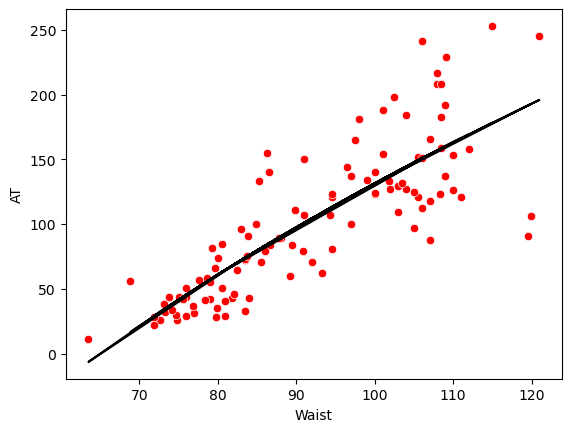

In [43]:
sns.scatterplot(y='AT',x='Waist',data=wc,color='red')
plt.plot(wc['Waist'],curt_model.fittedvalues,color='black')
plt.show()

In [44]:
cmse=mean_squared_error(wc['AT'],curt_model.fittedvalues)
crmse=np.sqrt(cmse)
print(cmse,crmse,curt_model.rsquared)

1058.8652430005855 32.540209633629985 0.674453084394445


### Exponential

In [45]:
exp_model=smf.ols('np.log(AT)~Waist',data=wc).fit()
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.68e-30
Time:                        13:27:28   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
exp_model.fittedvalues

0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
         ...   
104    4.770288
105    4.496571
106    4.838717
107    5.084257
108    5.108408
Length: 109, dtype: float64

In [47]:
np.exp(exp_model.fittedvalues)

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [48]:
emse=mean_squared_error(wc['AT'],np.exp(exp_model.fittedvalues))
ermse=np.sqrt(emse)
print(emse,ermse,exp_model.rsquared)

1484.4839764734713 38.52900175807143 0.7071139664198057


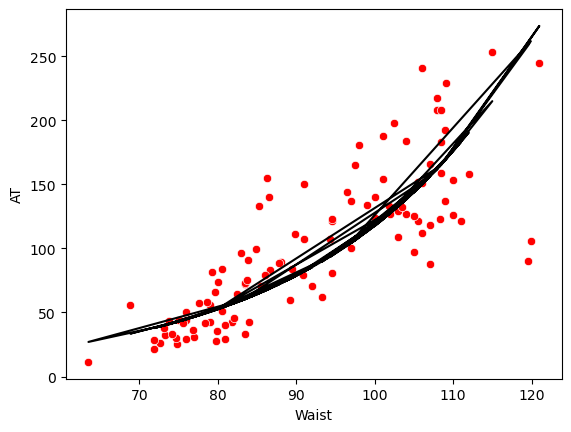

In [49]:
sns.scatterplot(y='AT',x='Waist',data=wc,color='red')
plt.plot(wc['Waist'],np.exp(exp_model.fittedvalues),color='black')
plt.show()

### Exponential + Quadratic 

In [50]:
wc['sq_waist']=wc['Waist']*wc['Waist']

In [51]:
eq_model=smf.ols('np.log(AT)~Waist+sq_waist',data=wc).fit()
eq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.80e-35
Time:                        13:27:28   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
sq_waist      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
np.exp(eq_model.fittedvalues)

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [53]:
eqmse=mean_squared_error(wc['AT'],np.exp(eq_model.fittedvalues))
eqrmse=np.sqrt(eqmse)
print(eqmse,eqrmse,eq_model.rsquared)

1039.704415717305 32.24444782776261 0.7789817667713609


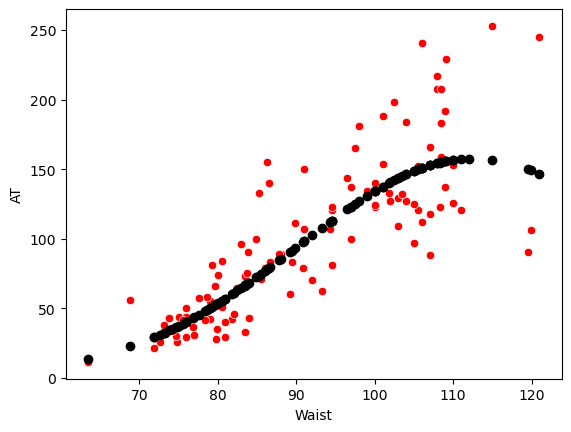

In [54]:
sns.scatterplot(y='AT',x='Waist',data=wc,color='red')
plt.scatter(wc['Waist'],np.exp(eq_model.fittedvalues),color='black')
plt.show()

In [55]:
result=pd.DataFrame(index=['MSE','RMSE','Rsquared'])

In [56]:
result['Raw Data']=mse,rmse,model.rsquared
result['Log']=lmse,lrmse,log_model.rsquared
result['Sqrt']=smse,srmse,sqrt_model.rsquared
result['cubrt']=cmse,crmse,curt_model.rsquared
result['exp']=emse,ermse,exp_model.rsquared
result['exp_qaud']=eqmse,eqrmse,eq_model.rsquared

In [57]:
result

,Raw Data,Log,Sqrt,cubrt,exp,exp_qaud
MSE,1073.229230,1056.047529,1061.382151,1058.865243,1484.483976,1039.704416
RMSE,32.760177,32.496885,32.578860,32.540210,38.529002,32.244448
Rsquared,0.670037,0.675319,0.673679,0.674453,0.707114,0.778982


In [77]:
rs=result.transpose()
rs

,MSE,RMSE,Rsquared
Raw Data,1073.229230,32.760177,0.670037
Log,1056.047529,32.496885,0.675319
Sqrt,1061.382151,32.578860,0.673679
cubrt,1058.865243,32.540210,0.674453
exp,1484.483976,38.529002,0.707114
exp_qaud,1039.704416,32.244448,0.778982


<Axes: xlabel='MSE'>

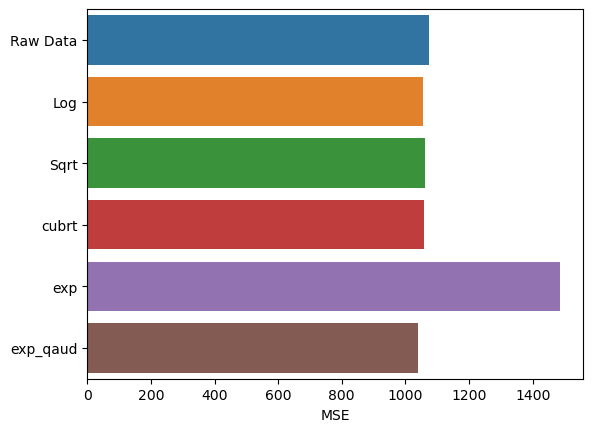

In [79]:
sns.barplot(x='MSE',y=rs.index,data=rs)